In [13]:
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import spacy
import nltk

path = 'Documents/gardening_analysis/'
files = [f for f in listdir(path) if isfile(join(path, f))]
word = []
sentence = []
for f in files:
    tree = ET.parse(join(path,f))
    root = tree.getroot()
    for child in root:
        if child.attrib.get('TagName'):
            word.append(child.attrib.get('TagName'))
        if child.attrib.get('Tags'):
            word.append(child.attrib.get('Tags'))
        if child.attrib.get('Text'):
            sentence.append(child.attrib.get('Text'))
        if child.attrib.get('Body'):
            sentence.append(child.attrib.get('Body')) 

In [14]:
from collections import Counter
print(len(sentence), len(word))
print(len(set(sentence)), len(set(word)))
sentence_count_dict = dict(Counter(sentence))
popular_sentence = sorted(sentence_count_dict, key = lambda key: sentence_count_dict[key])
popular_sentence[1:3]


121177 9011
115228 6044


['This kind of plant needs much sun and air to thrive. Try making here a better place on your balcony.\r\n\r\nIt is possible there is nothing you can do for it, sorry. And we can see that it has already a very long tail with no leaves. It must be quite old already.\r\n\r\n',
 'How often should you water saplings that were shipped by mail for the first week?']

In [15]:
from spacy import displacy

nlp = spacy.load('en')
one_sentence = nlp(popular_sentence[1])
displacy.render(one_sentence, style = 'dep', jupyter=True, options = {'distance':140})



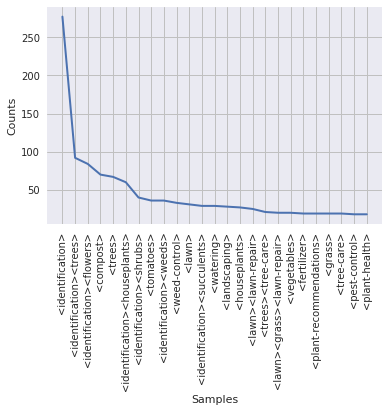

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

freqdist1 = nltk.FreqDist(word)
freqdist1.plot(25)